In [1]:
import numpy as np
import pandas as pd # a dataframe library. A dataframe is a matrix
import nltk # this is a library which makes text processing much easier
import re # the regular expression library
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [2]:
pd.set_option("display.max_colwidth", 2000)
df = pd.read_csv("acq4.csv", sep=",")
df.columns = ['index', "docs"]
df

,index,docs
0,1,NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VIA > BID Viacom International Inc said & lt ; National Amusements Inc > has again raised the value of its offer for Viacom ' s publicly held stock . The company said the special committee of its board plans to meet later today to consider this offer and the one submitted March one by & lt ; MCV Holdings Inc >. A spokeswoman was unable to say if the committee met as planned yesterday . Viacom said National Amusements ' Arsenal Holdings Inc subsidiary has raised the amount of cash it is offering for each Viacom share by 75 cts to 42 . 75 dlrs while the value of the fraction of a share of exchangeable Arsenal Holdings preferred to be included was raised 25 cts to 7 . 75 dlrs . National Amusements already owns 19 . 6 pct of Viacom ' s stock .
1,2,"U . K . GROWING IMPATIENT WITH JAPAN - THATCHER Prime Minister Margaret Thatcher said the U . K . Was growing more impatient with Japanese trade barriers and warned that it would soon have new powers against countries not offering reciprocal access to their markets . She told Parliament that the bid by the U . K .' s Cable and Wireless Plc & lt ; CAWL . L > to enter the Japanese telecommunications market was being regarded by her government as a test case . "" I wrote to the prime minister of Japan , Mr Nakasone , on the fourth of March to express our interest on the Cable and Wireless bid . I have not yet had a reply . We see this as a test on how open the Japanese market really is ,"" Thatcher said . Thatcher told Parliament that "" shortly ... We shall have more powers than we have now , when , for example the powers under the Financial Services Act and the Banking Act become available , then we shall be able to take action in cases where other countries do not offer the same full access to financial services as we do ."" Cable and Wireless is seeking a stake in the proposed Japanese telecommunications rival to Kokusai Denshin Denwa . But the Japanese minister for post and telecommunications was reported as saying that he opposed Cable and Wireless having a managerial role in the new company ."
2,3,"GOULD & lt ; GLD > COMPLETES SALE OF FRENCH BATTERY UNIT Gould Inc said it has completed the sale of its French battery business , Compagnie Francaise D ' Electro Chimie , to a group of investors including the unit ' s employees and & lt ; GNB Inc > of Minnesota . Gould did not disclose terms of the deal . Gould said the move is part of its previously announced plan to divest assets unrelated to its computer and electronics businesses ."
3,4,"FIRST WISCONSIN & lt ; FWB > TO BUY MINNESOTA BANK First Wisconsin Corp said it plans to acquire Shelard Bancshares Inc for about 25 mln dlrs in cash , its first acquisition of a Minnesota - based bank . First Wisconsin said Shelard is the holding company for two banks with total assets of 168 mln dlrs . First Wisconsin , which had assets at yearend of 7 . 1 billion dlrs , said the Shelard purchase price is about 12 times the 1986 earnings of the bank . It said the two Shelard banks have a total of five offices in the Minneapolis - St . Paul area ."
4,5,"& lt ; MERIDIAN ENERGY >, CASTONE END LETTER OF INTENT & lt ; Meridian Energy Inc > and Castone Development Corp , a privately - held company , jointly announced that they have decided to terminate the letter of intent under which Meridian would have acquired Castone ."
...,...,...
1181,851,"MILLER TABAK HAS 91 . 8 PCT OF PENN TRAFFIC & lt ; PNF > & lt ; Miller Tabak Hirsch and Co > said it has received an accepted 3 , 424 , 729 common shares of Penn Traffic Co in response to its 31 . 60 dlr per share tender offer that expired Friday , and together with the 380 , 728 shares it already owned , it now has about 91 . 8 pct of Penn Traffic . The company said Penn Traffic is expected to hold a special shareholders ' meeting later this month to approve a merger into Miller Tabak at the tender price . It said two Miller Tabak representatives will b

In [3]:
#We removed RE_TWEET line from the code because our csv file is not twitter text so we do not need to remove "rt"
#Other lines of codes are neccasery for cleaning the data
# define the regular expression patterns we want to look for
START_OF_LINE = "^"
OPTIONAL = "?"
#ANYTHING = "."
ZERO_OR_MORE = "*"
ONE_OR_MORE = "+"
SPACE = "\s"
ATSIGN = '@\w+'
PUNCTUATION = '[^\w\s]' #^=not, \w=alphanumeric character, \s=space
SPACES = SPACE + ONE_OR_MORE
NOT_SPACE = "[^\s]" + ONE_OR_MORE
#EVERYTHING_OR_NOTHING = ANYTHING + ZERO_OR_MORE
ERASE = ""
FORWARD_SLASH = "\/"
NEWLINES = "[\r\n]"
HASH = "#\w+"
HYPERLINKS = ("http" + "s" + OPTIONAL + ":" + FORWARD_SLASH + FORWARD_SLASH + NOT_SPACE + NEWLINES + ZERO_OR_MORE)
#Removing stop words in english and we remove words that are use in our dataset but mislead our data
stop_words = english_stopwords = stopwords.words('english') + ['said','It','would','1','000','one','u','2','5','two','3']
#replace the regular expression patterns with nothing (i.e., remove them)
df["processed_docs"] = df["docs"].str.lower()
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub(HYPERLINKS, ERASE, x))
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub(HASH, ERASE, x))
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub(ATSIGN, ERASE, x))
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub(PUNCTUATION, ERASE, x))
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub('\n', ' ', x))
#Removing stop words
df["processed_docs"] = df["processed_docs"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df

,index,docs,processed_docs
0,1,NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VIA > BID Viacom International Inc said & lt ; National Amusements Inc > has again raised the value of its offer for Viacom ' s publicly held stock . The company said the special committee of its board plans to meet later today to consider this offer and the one submitted March one by & lt ; MCV Holdings Inc >. A spokeswoman was unable to say if the committee met as planned yesterday . Viacom said National Amusements ' Arsenal Holdings Inc subsidiary has raised the amount of cash it is offering for each Viacom share by 75 cts to 42 . 75 dlrs while the value of the fraction of a share of exchangeable Arsenal Holdings preferred to be included was raised 25 cts to 7 . 75 dlrs . National Amusements already owns 19 . 6 pct of Viacom ' s stock .,national amusements ups viacom lt via bid viacom international inc lt national amusements inc raised value offer viacom publicly held stock company special committee board plans meet later today consider offer submitted march lt mcv holdings inc spokeswoman unable say committee met planned yesterday viacom national amusements arsenal holdings inc subsidiary raised amount cash offering viacom share 75 cts 42 75 dlrs value fraction share exchangeable arsenal holdings preferred included raised 25 cts 7 75 dlrs national amusements already owns 19 6 pct viacom stock
1,2,"U . K . GROWING IMPATIENT WITH JAPAN - THATCHER Prime Minister Margaret Thatcher said the U . K . Was growing more impatient with Japanese trade barriers and warned that it would soon have new powers against countries not offering reciprocal access to their markets . She told Parliament that the bid by the U . K .' s Cable and Wireless Plc & lt ; CAWL . L > to enter the Japanese telecommunications market was being regarded by her government as a test case . "" I wrote to the prime minister of Japan , Mr Nakasone , on the fourth of March to express our interest on the Cable and Wireless bid . I have not yet had a reply . We see this as a test on how open the Japanese market really is ,"" Thatcher said . Thatcher told Parliament that "" shortly ... We shall have more powers than we have now , when , for example the powers under the Financial Services Act and the Banking Act become available , then we shall be able to take action in cases where other countries do not offer the same full access to financial services as we do ."" Cable and Wireless is seeking a stake in the proposed Japanese telecommunications rival to Kokusai Denshin Denwa . But the Japanese minister for post and telecommunications was reported as saying that he opposed Cable and Wireless having a managerial role in the new company .",k growing impatient japan thatcher prime minister margaret thatcher k growing impatient japanese trade barriers warned soon new powers countries offering reciprocal access markets told parliament bid k cable wireless plc lt cawl l enter japanese telecommunications market regarded government test case wrote prime minister japan mr nakasone fourth march express interest cable wireless bid yet reply see test open japanese market really thatcher thatcher told parliament shortly shall powers example powers financial services act banking act become available shall able take action cases countries offer full access financial services cable wireless seeking stake proposed japanese telecommunications rival kokusai denshin denwa japanese minister post telecommunications reported saying opposed cable wireless managerial role new company
2,3,"GOULD & lt ; GLD > COMPLETES SALE OF FRENCH BATTERY UNIT Gould Inc said it has completed the sale of its French battery business , Compagnie Francaise D ' Electro Chimie , to a group of investors including the unit ' s employees and & lt ; GNB Inc > of Minnesota . Gould did not disclose terms of the deal . Gould said the move is part of its previously announced plan to divest assets unrelated to its computer and electronics businesses .

In [4]:
# build TF-IDF features for your dataset
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
# Store tf-idf representations of all docs
x = v.fit_transform(df['processed_docs'])
df_tfidf = pd.DataFrame(x.todense())

In [5]:
#What each column represents
v.vocabulary_

{'national': 5156,
 'amusements': 891,
 'ups': 7892,
 'viacom': 7965,
 'lt': 4669,
 'via': 7963,
 'bid': 1343,
 'international': 4164,
 'inc': 4000,
 'raised': 6132,
 'value': 7927,
 'offer': 5341,
 'publicly': 6040,
 'held': 3778,
 'stock': 7229,
 'company': 1985,
 'special': 7107,
 'committee': 1970,
 'board': 1391,
 'plans': 5751,
 'meet': 4873,
 'later': 4452,
 'today': 7606,
 'consider': 2096,
 'submitted': 7295,
 'march': 4761,
 'mcv': 4849,
 'holdings': 3846,
 'spokeswoman': 7145,
 'unable': 7793,
 'say': 6722,
 'met': 4910,
 'planned': 5749,
 'yesterday': 8253,
 'arsenal': 1045,
 'subsidiary': 7303,
 'amount': 882,
 'cash': 1671,
 'offering': 5343,
 'share': 6871,
 '75': 470,
 'cts': 2309,
 '42': 305,
 'dlrs': 2665,
 'fraction': 3402,
 'exchangeable': 3028,
 'preferred': 5864,
 'included': 4004,
 '25': 189,
 'already': 833,
 'owns': 5509,
 '19': 106,
 'pct': 5618,
 'growing': 3649,
 'impatient': 3973,
 'japan': 4253,
 'thatcher': 7531,
 'prime': 5909,
 'minister': 4985,
 'marga

In [6]:
x.toarray().shape

(1186, 8272)

In [7]:
feature_names = v.get_feature_names()
dense = x.todense()
lst1 = dense.tolist()
df_tfidf = pd.DataFrame(lst1, columns=feature_names)
df_tfidf

,00,008,01,015,016,02,030,0333,035,04,...,yuear,zealand,zero,zico,zimbabwe,zimmer,zirconium,zuccherifici,zuckerman,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#finding word lengts
word_lengts = [len(w) for w in df_tfidf]

Text(0.5, 0, 'Word Lengts')

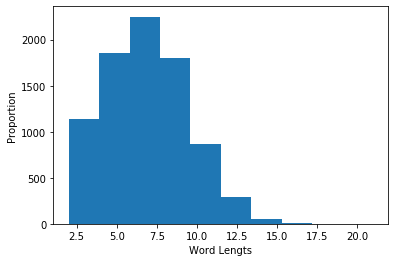

In [9]:
#creating a histogram with word lengts 
plt.hist(word_lengts)
plt.ylabel('Proportion')
plt.xlabel('Word Lengts')

In [10]:
#Finding sentence lengts
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [11]:
df = pd.read_csv("acq4.csv", sep=",")
df.columns = ['index', "docs"]

In [12]:
tokenizer = RegexpTokenizer(r'\w+')

In [13]:
my_text = '. '.join(df['docs'])

In [14]:
my_words = tokenizer.tokenize(my_text)

In [15]:
my_sentences = my_text.replace(",", ".").replace("?", ".").split(".")

In [16]:
my_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in my_sentences]

In [17]:
my_sent_len = [i for i in my_sent_lenghs if i!=0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Proportion')

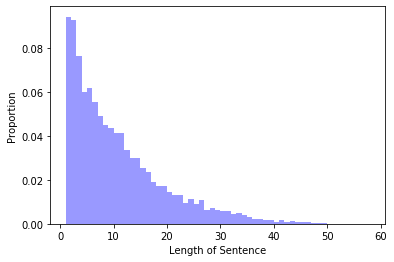

In [18]:
#Lengths of words
plt.hist(my_sent_len, bins=range(min(my_sent_len), max(my_sent_len) + 1, 1),
              alpha=0.4, color="blue", normed=True)
plt.xlabel("Length of Sentence")
plt.ylabel("Proportion")

In [19]:
#We equaled K to three because after couple of repeat we decided that three cluster will give more accurate results
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(df_tfidf)
labels = KMeans(n_clusters=3).fit_predict(df_tfidf)

In [20]:
labels

array([1, 1, 2, ..., 1, 0, 2], dtype=int32)

In [21]:
#Top frequent words before data processing
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
v_unprocessed = TfidfVectorizer()
# Store tf-idf representations of all docs

#transforming unprocessed data and creating data frame with unprocessed data
x_unprocessed = v_unprocessed.fit_transform(df['docs'])
df_unprocessed = pd.DataFrame(x_unprocessed.todense())

In [22]:
feature_names = v_unprocessed.get_feature_names()
dense = x_unprocessed.todense()
lst1 = dense.tolist()
df_unprocessed = pd.DataFrame(lst1, columns=feature_names)
df_unprocessed

,00,000,008,01,015,016,02,030,0333,035,...,yuear,zealand,zero,zico,zimbabwe,zimmer,zirconium,zuccherifici,zuckerman,zurich
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1182,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1183,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1184,0.0,0.035769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#We equaled K to two
kmeans = KMeans(n_clusters=3).fit(df_unprocessed)
labels = KMeans(n_clusters=3).fit_predict(df_unprocessed)

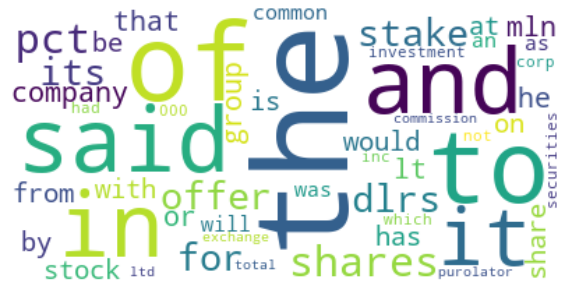

In [24]:
#Most common words before data processing
#As we can see when we do not process the data our most frequent words will be meaningless words which 
#we can not make any assumptions.

#filter rows of original data
c1 = df_unprocessed[labels == 0]
 
c2 = df_unprocessed[labels == 1]

c3 = df_unprocessed[labels == 2]

Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(c3.T.sum(axis=1))
plt.figure( figsize=(10,10) )
plt.imshow(Cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

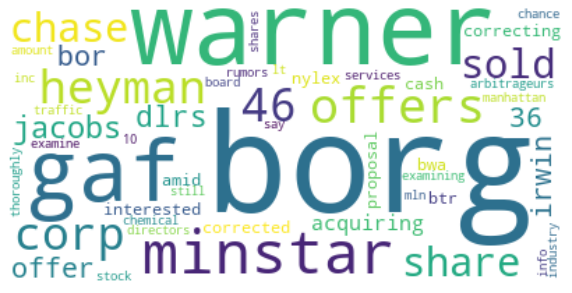

In [25]:
#Most common words after data processing
#We have much better understanding of the text

#filter rows of original data
c1 = df_tfidf[labels == 0]
 
c2 = df_tfidf[labels == 1]

c3 = df_tfidf[labels == 2]

Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(c1.T.sum(axis=1))
plt.figure( figsize=(10,10) )
plt.imshow(Cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
from nltk.stem.porter import *
from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
df = pd.read_csv("acq4.csv", sep=",")
df.columns = ['index', "docs"]
df

,index,docs
0,1,NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VIA > BID Viacom International Inc said & lt ; National Amusements Inc > has again raised the value of its offer for Viacom ' s publicly held stock . The company said the special committee of its board plans to meet later today to consider this offer and the one submitted March one by & lt ; MCV Holdings Inc >. A spokeswoman was unable to say if the committee met as planned yesterday . Viacom said National Amusements ' Arsenal Holdings Inc subsidiary has raised the amount of cash it is offering for each Viacom share by 75 cts to 42 . 75 dlrs while the value of the fraction of a share of exchangeable Arsenal Holdings preferred to be included was raised 25 cts to 7 . 75 dlrs . National Amusements already owns 19 . 6 pct of Viacom ' s stock .
1,2,"U . K . GROWING IMPATIENT WITH JAPAN - THATCHER Prime Minister Margaret Thatcher said the U . K . Was growing more impatient with Japanese trade barriers and warned that it would soon have new powers against countries not offering reciprocal access to their markets . She told Parliament that the bid by the U . K .' s Cable and Wireless Plc & lt ; CAWL . L > to enter the Japanese telecommunications market was being regarded by her government as a test case . "" I wrote to the prime minister of Japan , Mr Nakasone , on the fourth of March to express our interest on the Cable and Wireless bid . I have not yet had a reply . We see this as a test on how open the Japanese market really is ,"" Thatcher said . Thatcher told Parliament that "" shortly ... We shall have more powers than we have now , when , for example the powers under the Financial Services Act and the Banking Act become available , then we shall be able to take action in cases where other countries do not offer the same full access to financial services as we do ."" Cable and Wireless is seeking a stake in the proposed Japanese telecommunications rival to Kokusai Denshin Denwa . But the Japanese minister for post and telecommunications was reported as saying that he opposed Cable and Wireless having a managerial role in the new company ."
2,3,"GOULD & lt ; GLD > COMPLETES SALE OF FRENCH BATTERY UNIT Gould Inc said it has completed the sale of its French battery business , Compagnie Francaise D ' Electro Chimie , to a group of investors including the unit ' s employees and & lt ; GNB Inc > of Minnesota . Gould did not disclose terms of the deal . Gould said the move is part of its previously announced plan to divest assets unrelated to its computer and electronics businesses ."
3,4,"FIRST WISCONSIN & lt ; FWB > TO BUY MINNESOTA BANK First Wisconsin Corp said it plans to acquire Shelard Bancshares Inc for about 25 mln dlrs in cash , its first acquisition of a Minnesota - based bank . First Wisconsin said Shelard is the holding company for two banks with total assets of 168 mln dlrs . First Wisconsin , which had assets at yearend of 7 . 1 billion dlrs , said the Shelard purchase price is about 12 times the 1986 earnings of the bank . It said the two Shelard banks have a total of five offices in the Minneapolis - St . Paul area ."
4,5,"& lt ; MERIDIAN ENERGY >, CASTONE END LETTER OF INTENT & lt ; Meridian Energy Inc > and Castone Development Corp , a privately - held company , jointly announced that they have decided to terminate the letter of intent under which Meridian would have acquired Castone ."
...,...,...
1181,851,"MILLER TABAK HAS 91 . 8 PCT OF PENN TRAFFIC & lt ; PNF > & lt ; Miller Tabak Hirsch and Co > said it has received an accepted 3 , 424 , 729 common shares of Penn Traffic Co in response to its 31 . 60 dlr per share tender offer that expired Friday , and together with the 380 , 728 shares it already owned , it now has about 91 . 8 pct of Penn Traffic . The company said Penn Traffic is expected to hold a special shareholders ' meeting later this month to approve a merger into Miller Tabak at the tender price . It said two Miller Tabak representatives will b

In [30]:
#We removed RE_TWEET line from the code because our csv file is not twitter text so we do not need to remove "rt"
#Other lines of codes are neccasery for cleaning the data
# define the regular expression patterns we want to look for
START_OF_LINE = "^"
OPTIONAL = "?"
ZERO_OR_MORE = "*"
ONE_OR_MORE = "+"
SPACE = "\s"
ATSIGN = '@\w+'
PUNCTUATION = '[^\w\s]' #^=not, \w=alphanumeric character, \s=space
SPACES = SPACE + ONE_OR_MORE
NOT_SPACE = "[^\s]" + ONE_OR_MORE
ERASE = ""
FORWARD_SLASH = "\/"
NEWLINES = "[\r\n]"
HASH = "#\w+"
HYPERLINKS = ("http" + "s" + OPTIONAL + ":" + FORWARD_SLASH + FORWARD_SLASH + NOT_SPACE + NEWLINES + ZERO_OR_MORE)
#Removing stop words in english and we remove words that are use in our dataset but mislead our data
stop_words = english_stopwords = stopwords.words('english') + ['said','It','would','1','000','one','u','2','5','two','3']
#replace the regular expression patterns with nothing (i.e., remove them)
df["processed_docs"] = df["docs"].str.lower()
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub(HYPERLINKS, ERASE, x))
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub(HASH, ERASE, x))
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub(ATSIGN, ERASE, x))
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub(PUNCTUATION, ERASE, x))
df["processed_docs"] = df["processed_docs"].apply(lambda x: re.sub('\n', ' ', x))
#Removing stop words
df["processed_docs"] = df["processed_docs"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df

,index,docs,processed_docs
0,1,NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VIA > BID Viacom International Inc said & lt ; National Amusements Inc > has again raised the value of its offer for Viacom ' s publicly held stock . The company said the special committee of its board plans to meet later today to consider this offer and the one submitted March one by & lt ; MCV Holdings Inc >. A spokeswoman was unable to say if the committee met as planned yesterday . Viacom said National Amusements ' Arsenal Holdings Inc subsidiary has raised the amount of cash it is offering for each Viacom share by 75 cts to 42 . 75 dlrs while the value of the fraction of a share of exchangeable Arsenal Holdings preferred to be included was raised 25 cts to 7 . 75 dlrs . National Amusements already owns 19 . 6 pct of Viacom ' s stock .,national amusements ups viacom lt via bid viacom international inc lt national amusements inc raised value offer viacom publicly held stock company special committee board plans meet later today consider offer submitted march lt mcv holdings inc spokeswoman unable say committee met planned yesterday viacom national amusements arsenal holdings inc subsidiary raised amount cash offering viacom share 75 cts 42 75 dlrs value fraction share exchangeable arsenal holdings preferred included raised 25 cts 7 75 dlrs national amusements already owns 19 6 pct viacom stock
1,2,"U . K . GROWING IMPATIENT WITH JAPAN - THATCHER Prime Minister Margaret Thatcher said the U . K . Was growing more impatient with Japanese trade barriers and warned that it would soon have new powers against countries not offering reciprocal access to their markets . She told Parliament that the bid by the U . K .' s Cable and Wireless Plc & lt ; CAWL . L > to enter the Japanese telecommunications market was being regarded by her government as a test case . "" I wrote to the prime minister of Japan , Mr Nakasone , on the fourth of March to express our interest on the Cable and Wireless bid . I have not yet had a reply . We see this as a test on how open the Japanese market really is ,"" Thatcher said . Thatcher told Parliament that "" shortly ... We shall have more powers than we have now , when , for example the powers under the Financial Services Act and the Banking Act become available , then we shall be able to take action in cases where other countries do not offer the same full access to financial services as we do ."" Cable and Wireless is seeking a stake in the proposed Japanese telecommunications rival to Kokusai Denshin Denwa . But the Japanese minister for post and telecommunications was reported as saying that he opposed Cable and Wireless having a managerial role in the new company .",k growing impatient japan thatcher prime minister margaret thatcher k growing impatient japanese trade barriers warned soon new powers countries offering reciprocal access markets told parliament bid k cable wireless plc lt cawl l enter japanese telecommunications market regarded government test case wrote prime minister japan mr nakasone fourth march express interest cable wireless bid yet reply see test open japanese market really thatcher thatcher told parliament shortly shall powers example powers financial services act banking act become available shall able take action cases countries offer full access financial services cable wireless seeking stake proposed japanese telecommunications rival kokusai denshin denwa japanese minister post telecommunications reported saying opposed cable wireless managerial role new company
2,3,"GOULD & lt ; GLD > COMPLETES SALE OF FRENCH BATTERY UNIT Gould Inc said it has completed the sale of its French battery business , Compagnie Francaise D ' Electro Chimie , to a group of investors including the unit ' s employees and & lt ; GNB Inc > of Minnesota . Gould did not disclose terms of the deal . Gould said the move is part of its previously announced plan to divest assets unrelated to its computer and electronics businesses .

In [31]:
# Getting bigrams 
vectorizer = CountVectorizer(ngram_range =(2, 2))
X1 = vectorizer.fit_transform(df['processed_docs'])
features = (vectorizer.get_feature_names())
print("\n\nX1 : \n", X1.toarray())

# Applying TFIDF
# You can still get n-grams here
vectorizer = TfidfVectorizer(ngram_range = (2, 2))
X2 = vectorizer.fit_transform(df['processed_docs'])
scores = (X2.toarray())
print("\n\nScores : \n", scores)

# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords : \n", words.head(7))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                       term       rank
26498             mln dlrs  24.981041
14328           dlrs share   8.968612
30204            per share   8.674851
9903          common stock   7.757779
11668              corp lt   7.531592
6956           borg warner   7.495685
35584  securities exchange   7.120197


In [32]:
# Getting trigrams 
vectorizer = CountVectorizer(ngram_range = (3,3))
X1 = vectorizer.fit_transform(df['processed_docs']) 
features = (vectorizer.get_feature_names())
print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())
                           
# Applying TFIDF
vectorizer = TfidfVectorizer(ngram_range = (3,3))
X2 = vectorizer.fit_transform(df['processed_docs'])
scores = (X2.toarray())
print("\n\nScores : \n", scores)
        
# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(7))



Features : 
 ['00 14 25', '00 27 648', '00 31 00', '00 dlrs 40', '00 dlrs per', '00 dlrs share', '008 857 shares', '01 16 74', '01 pct interest', '01 pct peabody', '01 pct stake', '015 800 shares', '016 common shares', '02 billion dlr', '030 new shares', '0333 berry common', '035 series convertible', '04 dlrs share', '04 mln stg', '049 gencorp common', '05 billion dlr', '05 dlrs 1987', '05 mln shares', '05 pct shares', '050 belgian francs', '054 shares already', '059 dlr fund', '06 mln shares', '06 shares lomak', '061 shares 95', '0687 share chrysler', '070 shares 22', '08 mln shares', '083 800 shares', '0840 less 0687', '09 dlrs share', '09 pct enlarged', '0900 gmt quoted', '0915 gmt compared', '098 602 shares', '10 00 14', '10 10 625', '10 17 dlrs', '10 262 307', '10 27 prices', '10 31 ordinary', '10 31 prices', '10 36 mln', '10 45 mln', '10 625 dlrs', '10 75 mln', '10 billion dlrs', '10 billion yen', '10 cents nine', '10 cents share', '10 day extension', '10 day period', '10 days 



Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                                  term      rank
46129  securities exchange commission  7.029822
18583                  dlrs per share  5.173477
21752      filing securities exchange  4.253917
39384           pct total outstanding  4.029882
34486                   mln dlrs cash  3.412519
53352        told securities exchange  3.227359
48442            signed letter intent  3.101406
